# Factory
This notebook presents some useful examples of *LEGB scope* and *Factory Design Pattern* in Python3.

## LEGB Scope Model
Python3 defines a complex and convenient scope model called **LEGB**. Variable names are resolved in the following order:
   1. **L**ocal, first analyze the local scope (current identation level, current code block);
   + **E**nclosed, second analyze the enclosed scope (nested functions level);
   + **G**lobal, third analyze the [module][12] scope (python module file level);
   + **B**uiltin, fourth analyze the [built-in][11] scope (python level).

There are some sparse documentation about this scope model spread over the internet. The reader who is intersted to learn more about this important topic should read the following articles: [Python Execution Model][1], [Variable & Scope][2], [Scope Resolution & LEGB Model][3], [Short Definition of Scoping Rules][4]

And also learn about generic informatic concepts such as [scope][5], [closure][10], [shadowing][6] and [overloading][7].

[1]: https://docs.python.org/3/reference/executionmodel.html
[2]: http://python-textbok.readthedocs.io/en/1.0/Variables_and_Scope.html
[3]: http://sebastianraschka.com/Articles/2014_python_scope_and_namespaces.html
[4]: http://stackoverflow.com/q/291978/3067485
[5]: https://en.wikipedia.org/wiki/Scope_(computer_science)
[6]: https://en.wikipedia.org/wiki/Variable_shadowing
[7]: https://en.wikipedia.org/wiki/Function_overloading
[10]: https://en.wikipedia.org/wiki/Closure_(computer_programming)
[11]: https://docs.python.org/3/library/functions.html
[12]: https://docs.python.org/3/tutorial/modules.html

## Syntax
A generic syntax for a *Function Factory* is:

In [1]:
# Function Factory:
def FunctionFactory(*fact_args):
    # Parametred Function:
    def inner(*inner_args):
        # Perform some operation here with both factory and function arguments:
        result = ...
        # Ellipsis: Do what you must and then return result:
        return result
    # Return parametred function
    return inner

A generic syntax *Object Factory* is:

In [2]:
# Object Factory:
def ObjectFactory(*fact_args):
    # Preconfigure some object with factory arguments:
    obj = ...
    # Return parametred object
    return obj

## A quick start example
We start here with a quick and short example showing how we can easily create a simple function factory for generating different parametred Rosenbrock functions.

### Rosenbrock Functions
[Rosenbrock functions][8] can be thought as real functions of two variables such as:
$$
f(x,y,a,b) = (a-x)^2 + b\cdot(y-x^2)^2
$$

Hence:
$$
x,y,a,b\neq 0 \in \mathbb{R}
$$

Where $x, y$ are independant variables and $a,b$ parameters. There are useful in numerical analysis, we will make use of them in other articles, so we define here a convenient way to produce them easily.

[8]: https://en.wikipedia.org/wiki/Rosenbrock_function

### Function Factory
In Python everything is object so are functions. A function factory is a function that returns another function. And the magic comes with the fact that local variable of the outer function are accessible to the inner function. 

A useful function factory for Rosenbrock functions may have the following form:

In [3]:
def rosenbrock_factory(a, b):
    """
    Rosenbrock Function Factory
    """
    def rosenbrock(x, y):
        """
        Parametered Rosenbrock Function
        """
        return (a-x)**2+b*(y-x**2)**2
    return rosenbrock

After the factory is defined we can call it to create an instance of a parametred RosenBrock function:

In [4]:
f = rosenbrock_factory(1, 100)

This generate an instance of Rosenbrock function with $a=1, b=100$, defining the following function:

$$
f(x,y) = (1-x)^2 + 100\cdot(y-x^2)^2
$$

If we check out what `f` is, we can see that it is a function object which contains locals from its factory:

In [5]:
f

<function __main__.rosenbrock_factory.<locals>.rosenbrock(x, y)>

It means that `f` will be able to access variables passed to `rosenbrock_factory`. If we execute `f(x,y)` Python will try to resolve `a` and `b` from function locals (**L** level form LEGB scope), which are not defined in `rosenbrock`. Then it will try to resolve from enclosed (or embedded or nested) locals (**E** level from LEGB scope), which corresponds to `rosenbrock_factory` locals variables, which are gathered in `f` as function namespace suggests: `__main__.rosenbrock_factory.<locals>.rosenbrock`.

Now Python is able to perform arithmetics because `x`, `y` and `a`, `b` are defined and it can compute and return a numerical result.

If we execute the function to assess if $f(1,1)=0$, and we receive the correct result:

In [6]:
f(1,1)

0

### Usage
We simply illustrate here that our function behaves as expected.

In [7]:
# Required:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [8]:
mpl.rcParams["figure.figsize"] =  1.42*np.array(mpl.rcParams["figure.figsize"])

In [9]:
# Data:
t = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(t, t)
Z = f(X, Y)

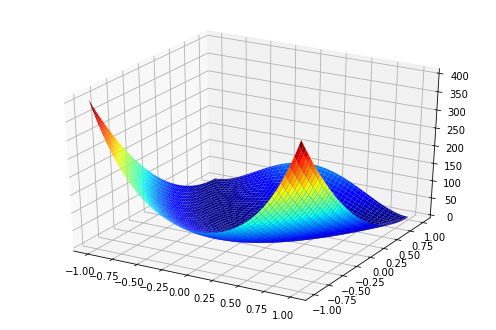

In [10]:
# Figure:
fig = plt.figure()
axe = fig.add_subplot(111, projection='3d')
surf = axe.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0.05, antialiased=True)

## Inspection
Python3 `inspect` module is a [great tool to inspect objects during runtime][9] (that is, objects living in memory during execution). We will presents here some useful method of this module that may help developper to better understand Python deep mechanics.

[9]: https://docs.python.org/3/library/inspect.html

In [11]:
import inspect

We can double check that `f` is a function:

In [12]:
inspect.isfunction(f)

True

### Doc Strings & Source Code
We can access *doc string*:

In [13]:
inspect.getdoc(rosenbrock_factory)

'Rosenbrock Function Factory'

In [14]:
inspect.getdoc(f)

'Parametered Rosenbrock Function'

And *source code*:

In [15]:
print(inspect.getsource(f))

    def rosenbrock(x, y):
        """
        Parametered Rosenbrock Function
        """
        return (a-x)**2+b*(y-x**2)**2



### Function signatures
We can check function signatures:

In [16]:
inspect.signature(rosenbrock_factory)

<Signature (a, b)>

In [17]:
inspect.signature(f)

<Signature (x, y)>

### Function closure
Even better we can check the function closure (mapping of all variables a function can access even if it is not in its scope):

In [18]:
inspect.getclosurevars(f)

ClosureVars(nonlocals={'a': 1, 'b': 100}, globals={}, builtins={}, unbound=set())

This confirms `f` do have access to factory parameters. We can check it with `nonlocals={'a': 1, 'b': 100}`. That is, `nonlocals` stands for this is what enclosed (**E**) level, which is neither local (**L**) variables nor global (**G**) or built-in (**B**) variables.

Note: `unbound` is a set instead of a dictionary, it holds unbound variables: that is, variables names which does not exist within the complete object scope and thus cannot be accessed.

#### Name Error

Here an exemple of function where global and local levels are working together:

In [19]:
a0 = 1
def unbound1(x):
    a1 = 5
    return a0*a1*a2*x

Either way variable `a2` is undefined within the complete scope and therefore is unbound:

In [20]:
inspect.getclosurevars(unbound1)

ClosureVars(nonlocals={}, globals={'a0': 1}, builtins={}, unbound={'a2'})

Trying to execute this function raises a `NameError` exception: 

In [21]:
try:
    unbound1(2)
except NameError as err:
    print(err)

name 'a2' is not defined


#### Unbound Error

Here an exemple where global scope cannot resolve properly (see [this article][1]):

[1]: https://stackoverflow.com/q/9264763/3067485

In [22]:
a0 = 1
def unbound2(x):
    a0 += 1
    return a0*x

Inspect does not have any unbound variable:

In [23]:
inspect.getclosurevars(unbound2)

ClosureVars(nonlocals={}, globals={}, builtins={}, unbound=set())

But Python will treat variable `a0` as local because it is assigned within the function scope:

In [24]:
try:
    unbound2(2)
except UnboundLocalError as err:
    print(err)

local variable 'a0' referenced before assignment


Notice that `UnboundLocalError` is a subclass of `NameError`:

In [25]:
issubclass(UnboundLocalError, NameError)

True

## Object Factory
Sometime we want to rely on other packages but some method signatures are not exaclty what we expect to be. Then we can think about factory to solve our problem.

Let say we want to rely on the amazing `scipy.stats` package but we are not plenty satistfied with Lognormal Distribution Random Variable object configuration. We want to make it fit our needs without writting a lot of code. This is a job for an Object Factory.

### Signature Modification
First we build an Object Factory, it is a function that returns a parametred object:

In [26]:
import scipy.stats
def lognormal(m, s):
    """
    User Friendly Lognormal Random Variable
    """
    return scipy.stats.lognorm(s=s, scale=np.exp(m))

### Usage
Then we can instantiate a new Random Variable that is parametred in a way we understand:

In [27]:
Xln = lognormal(np.log(0.014), np.log(1.80))

In [28]:
Xln

Then we can use it, as this, to draw sample or plot distribution:

In [29]:
d = np.logspace(-3, 0, 100, base=10)

In [30]:
fd = Xln.pdf(d)
Fd = Xln.cdf(d)

And plot it for comprehention sake...

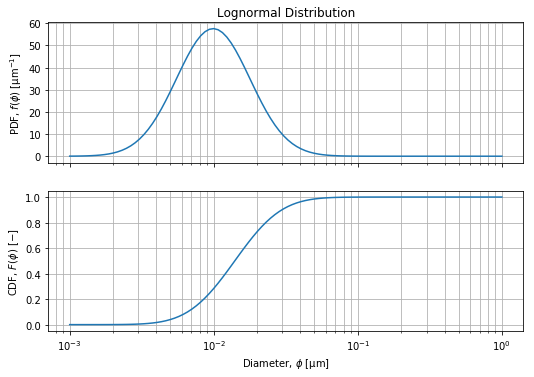

In [31]:
fig, axe = plt.subplots(2, 1, sharex=True)
axe[0].semilogx(d, fd)
axe[1].semilogx(d, Fd)
axe[0].set_title("Lognormal Distribution")
axe[1].set_xlabel("Diameter, $\phi$ $[\mathrm{\mu m}]$")
axe[0].set_ylabel("PDF, $f(\phi)$ $[\mathrm{\mu m}^{-1}]$")
axe[1].set_ylabel("CDF, $F(\phi)$ $[-]$")
axe[0].grid(which='both')
axe[1].grid(which='both')